In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import os
import pandas as pd

In [8]:
data_dir = "/kaggle/input/audio-dataset/Audio_Song_Actors_01-24 (2)/Audio_Song_Actors_01-24"

# Label mappings for clarity
emotion_dict = {
    '01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad',
    '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'
}
modality_dict = {'01': 'full-AV', '02': 'video-only', '03': 'audio-only'}
channel_dict = {'01': 'speech', '02': 'song'}
intensity_dict = {'01': 'normal', '02': 'strong'}
statement_dict = {'01': 'Kids are talking by the door', '02': 'Dogs are sitting by the door'}
gender_dict = lambda x: 'male' if int(x) % 2 else 'female'

# List to hold extracted data
data = []

# Walk through the directory and parse filenames
for actor_folder in os.listdir(data_dir):
    actor_path = os.path.join(data_dir, actor_folder)
    if not os.path.isdir(actor_path):
        continue
    for filename in os.listdir(actor_path):
        if filename.endswith('.wav'):
            parts = filename.split('.')[0].split('-')
            actor_id_str = parts[6]
            try:
                actor_id_int = int(actor_id_str)
                gender = gender_dict(actor_id_int)
            except ValueError:
                gender = 'unknown' # Or handle the error differently
                print(f"Could not parse actor_id for file: {filename}. Actor ID string: {actor_id_str}")

            data.append({
                'path': os.path.join(data_dir,actor_path, filename),
                'filename': filename,
                'modality': modality_dict[parts[0]],
                'vocal_channel': channel_dict[parts[1]],
                'emotion': emotion_dict[parts[2]],
                'intensity': intensity_dict.get(parts[3], 'normal'),
                'statement': statement_dict[parts[4]],
                'repeat': parts[5],
                'actor_id': actor_id_str,
                'gender': gender,
                'actor_folder': actor_folder
            })

# Create the DataFrame
df1 = pd.DataFrame(data)

In [9]:
df1.sample(5)

,path,filename,modality,vocal_channel,emotion,intensity,statement,repeat,actor_id,gender,actor_folder
793,/kaggle/input/audio-dataset/Audio_Song_Actors_...,03-02-04-02-02-01-09.wav,audio-only,song,sad,strong,Dogs are sitting by the door,01,09,male,Actor_09
406,/kaggle/input/audio-dataset/Audio_Song_Actors_...,03-02-06-02-02-01-15.wav,audio-only,song,fearful,strong,Dogs are sitting by the door,01,15,male,Actor_15
270,/kaggle/input/audio-dataset/Audio_Song_Actors_...,03-02-05-02-01-01-11.wav,audio-only,song,angry,strong,Kids are talking by the door,01,11,male,Actor_11
381,/kaggle/input/audio-dataset/Audio_Song_Actors_...,03-02-05-02-01-02-08.wav,audio-only,song,angry,strong,Kids are talking by the door,02,08,female,Actor_08
388,/kaggle/input/audio-dataset/Audio_Song_Actors_...,03-02-01-01-01-02-08.wav,audio-only,song,neutral,normal,Kids are talking by the door,02,08,female,Actor_08


In [10]:
data_dir = "/kaggle/input/audio-dataset/Audio_Speech_Actors_01-24/Audio_Speech_Actors_01-24"

# Label mappings for clarity
emotion_dict = {
    '01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad',
    '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'
}
modality_dict = {'01': 'full-AV', '02': 'video-only', '03': 'audio-only'}
channel_dict = {'01': 'speech', '02': 'song'}
intensity_dict = {'01': 'normal', '02': 'strong'}
statement_dict = {'01': 'Kids are talking by the door', '02': 'Dogs are sitting by the door'}
gender_dict = lambda x: 'male' if int(x) % 2 else 'female'

# List to hold extracted data
data = []

# Walk through the directory and parse filenames
for actor_folder in os.listdir(data_dir):
    actor_path = os.path.join(data_dir, actor_folder)
    if not os.path.isdir(actor_path):
        continue
    for filename in os.listdir(actor_path):
        if filename.endswith('.wav'):
            parts = filename.split('.')[0].split('-')
            actor_id_str = parts[6]
            try:
                actor_id_int = int(actor_id_str)
                gender = gender_dict(actor_id_int)
            except ValueError:
                gender = 'unknown' # Or handle the error differently
                print(f"Could not parse actor_id for file: {filename}. Actor ID string: {actor_id_str}")

            data.append({
                'path': os.path.join(data_dir,actor_path, filename),
                'filename': filename,
                'modality': modality_dict[parts[0]],
                'vocal_channel': channel_dict[parts[1]],
                'emotion': emotion_dict[parts[2]],
                'intensity': intensity_dict.get(parts[3], 'normal'),
                'statement': statement_dict[parts[4]],
                'repeat': parts[5],
                'actor_id': actor_id_str,
                'gender': gender,
                'actor_folder': actor_folder

            })
df2 = pd.DataFrame(data)

In [11]:
df = pd.concat([df1, df2])

# Shuffle the concatenated dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [12]:
df.drop(['actor_id','actor_folder','filename','modality','vocal_channel','intensity','repeat'],axis=1,inplace=True)

In [13]:
df.sample(5)

,path,emotion,statement,gender
199,/kaggle/input/audio-dataset/Audio_Speech_Actor...,angry,Dogs are sitting by the door,female
1396,/kaggle/input/audio-dataset/Audio_Speech_Actor...,surprised,Dogs are sitting by the door,male
317,/kaggle/input/audio-dataset/Audio_Speech_Actor...,angry,Dogs are sitting by the door,male
1915,/kaggle/input/audio-dataset/Audio_Speech_Actor...,calm,Kids are talking by the door,male
424,/kaggle/input/audio-dataset/Audio_Song_Actors_...,calm,Kids are talking by the door,male


In [14]:
df.drop(['statement','gender'],axis=1,inplace=True)

In [15]:
df.head()

,path,emotion
0,/kaggle/input/audio-dataset/Audio_Speech_Actor...,fearful
1,/kaggle/input/audio-dataset/Audio_Speech_Actor...,sad
2,/kaggle/input/audio-dataset/Audio_Speech_Actor...,fearful
3,/kaggle/input/audio-dataset/Audio_Speech_Actor...,fearful
4,/kaggle/input/audio-dataset/Audio_Speech_Actor...,angry


In [27]:
import seaborn as sns
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (InputLayer, TimeDistributed, Conv1D,Conv2D, MaxPooling2D,MaxPooling1D,
                                     BatchNormalization, Dropout, Flatten, LSTM, Dense)
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

<Axes: xlabel='emotion', ylabel='count'>

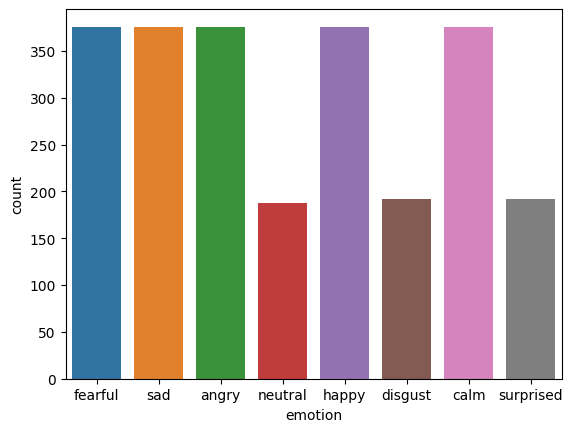

In [23]:
sns.countplot(df,x='emotion')

In [24]:
df.head()

,path,emotion,emotion_label
0,/kaggle/input/audio-dataset/Audio_Speech_Actor...,fearful,3
1,/kaggle/input/audio-dataset/Audio_Speech_Actor...,sad,6
2,/kaggle/input/audio-dataset/Audio_Speech_Actor...,fearful,3
3,/kaggle/input/audio-dataset/Audio_Speech_Actor...,fearful,3
4,/kaggle/input/audio-dataset/Audio_Speech_Actor...,angry,0


## Augmentation+MFCC

In [31]:
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Shapes:
 X_train: (7844, 40, 1) y_train: (7844, 8)
   X_val: (491, 40, 1)   y_val: (491, 8)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)                    │ (None, 40, 64)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 40, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 20, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 20, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 20, 128)             │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 20, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │           2,056 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 373,256 (1.42 MB)

 Trainable params: 372,360 (1.42 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50


I0000 00:00:1750695899.113509     105 service.cc:148] XLA service 0x7d50ac0038e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750695899.116002     105 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750695899.606501     105 cuda_dnn.cc:529] Loaded cuDNN version 90300


 56/246 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1802 - loss: 2.8080

I0000 00:00:1750695903.431653     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


246/246 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.2187 - loss: 2.4512 - val_accuracy: 0.3727 - val_loss: 1.5401
Epoch 2/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3424 - loss: 1.7341 - val_accuracy: 0.4460 - val_loss: 1.3952
Epoch 3/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4248 - loss: 1.5343 - val_accuracy: 0.4949 - val_loss: 1.2869
Epoch 4/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4540 - loss: 1.4442 - val_accuracy: 0.4949 - val_loss: 1.3074
Epoch 5/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4853 - loss: 1.3700 - val_accuracy: 0.5621 - val_loss: 1.1637
Epoch 6/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4841 - loss: 1.3450 - val_accuracy: 0.5336 - val_loss: 1.2290
Epoch 7/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5109 - loss: 1.2912 - val_accuracy: 0.4969 - val_loss: 1.2439
Epoch 8/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5357 - loss: 1.2600 - val_accuracy: 0.5784 - va

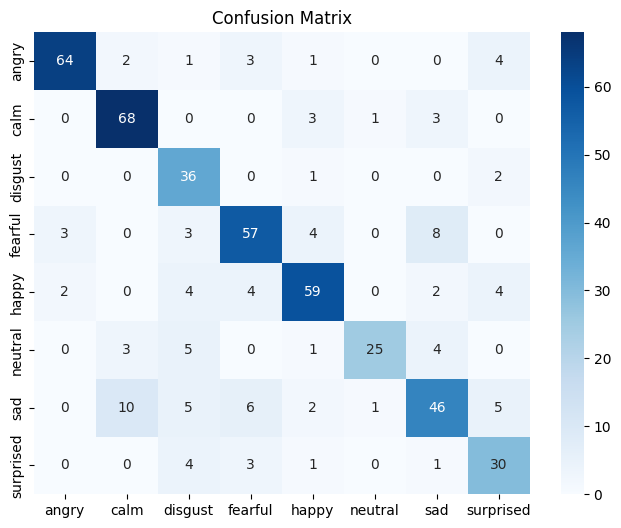


Classification Report:
              precision    recall  f1-score   support

       angry       0.93      0.85      0.89        75
        calm       0.82      0.91      0.86        75
     disgust       0.62      0.92      0.74        39
     fearful       0.78      0.76      0.77        75
       happy       0.82      0.79      0.80        75
     neutral       0.93      0.66      0.77        38
         sad       0.72      0.61      0.66        75
   surprised       0.67      0.77      0.71        39

    accuracy                           0.78       491
   macro avg       0.78      0.78      0.78       491
weighted avg       0.79      0.78      0.78       491



In [32]:
SR       = 16000   # sampling rate
N_MFCC   = 40      # number of MFCCs
TEST_SZ  = 0.20    # 20% test split
RND_SEED = 42


# ─── 1) Augmentation Functions ───────────────────────────────────────────────

def add_noise(data, noise_level=0.005):
    noise = np.random.randn(len(data))
    return data + noise_level * noise

def shift_pitch(data, sr, n_steps=2):
    return librosa.effects.pitch_shift(y=data, sr=sr, n_steps=n_steps)

def time_stretch(data, rate=1.1):
    return librosa.effects.time_stretch(y=data, rate=rate)


# ─── 2) Feature Extraction ────────────────────────────────────────────────────

def extract_mfcc_mean(y, sr, n_mfcc=N_MFCC):
    """Compute MFCC and return mean over time → shape (n_mfcc,)"""
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc.T, axis=0)


# ─── 3) Data Preparation ──────────────────────────────────────────────────────

def prepare_dataset(df, augment=False):
    """
    df must have columns ['path','emotion_label'].
    If augment=True, applies 1x noise, pitch, stretch PER AUDIO.
    Returns (X, y) as numpy arrays.
    """
    X, y = [], []
    for _, row in df.iterrows():
        path  = row['path']
        label = row['emotion_label']
        try:
            signal, sr = librosa.load(path, sr=SR)
        except Exception as e:
            print(f"⚠️ Could not load {path}: {e}")
            continue

        # --- original features
        feat = extract_mfcc_mean(signal, sr)
        X.append(feat); y.append(label)

        # --- augmentations (only if flag set)
        if augment:
            # noise
            x1 = add_noise(signal)
            X.append(extract_mfcc_mean(x1, sr)); y.append(label)

            # pitch up
            x2 = shift_pitch(signal, sr, n_steps=2)
            X.append(extract_mfcc_mean(x2, sr)); y.append(label)

            # time stretch
            x3 = time_stretch(signal, rate=1.1)
            X.append(extract_mfcc_mean(x3, sr)); y.append(label)

    return np.vstack(X), np.array(y)


# ─── 4) Load & Split ──────────────────────────────────────────────────────────

# assume df is already in your session with df['path'] & df['emotion']
le = LabelEncoder()
df['emotion_label'] = le.fit_transform(df['emotion'])

train_df, val_df = train_test_split(
    df, test_size=TEST_SZ, random_state=RND_SEED, stratify=df['emotion_label']
)

# prepare features
X_train, y_train = prepare_dataset(train_df, augment=True)
X_val,   y_val   = prepare_dataset(val_df,   augment=False)

# expand dims for Conv1D: (samples, timesteps=N_MFCC, channels=1)
X_train = X_train.reshape(-1, N_MFCC, 1)
X_val   = X_val.reshape(-1,   N_MFCC, 1)

# one-hot encode targets
num_classes   = len(le.classes_)
y_train_oh    = to_categorical(y_train, num_classes)
y_val_oh      = to_categorical(y_val,   num_classes)

print("Shapes:")
print(" X_train:", X_train.shape, "y_train:", y_train_oh.shape)
print("   X_val:",   X_val.shape,   "  y_val:",   y_val_oh.shape)


# ─── 5) Build & Compile CNN ──────────────────────────────────────────────────

model = Sequential([
    Conv1D(64, kernel_size=5, activation='relu',
           input_shape=(N_MFCC,1), padding='same'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),

    Conv1D(128, kernel_size=5, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


# ─── 6) Train ────────────────────────────────────────────────────────────────

history = model.fit(
    X_train, y_train_oh,
    validation_data=(X_val, y_val_oh),
    epochs=50,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)]
)


# ─── 7) Evaluate & Report ────────────────────────────────────────────────────

# final validation accuracy
val_loss, val_acc = model.evaluate(X_val, y_val_oh, verbose=0)
print(f"\nValidation Loss: {val_loss:.4f}  —  Validation Accuracy: {val_acc:.4f}")

# confusion matrix & classification report
y_pred = np.argmax(model.predict(X_val), axis=1)
cm     = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_,
            cmap='Blues')
plt.title("Confusion Matrix"); plt.show()

print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=le.classes_))


## MFCC+dMFCC+ddMFCC+Augmentation

In [33]:
SR = 16000                # Sampling rate
TARGET_DURATION = 5       # in seconds
MAX_LEN = SR * TARGET_DURATION  # 80000 samples

def pad_or_crop(signal, sr=SR, target_duration=TARGET_DURATION):
    max_len = sr * target_duration
    if len(signal) < max_len:
        return np.pad(signal, (0, max_len - len(signal)))
    else:
        return signal[:max_len]


In [34]:
def extract_mfcc_full(y, sr, n_mfcc=40):
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
    return np.stack([mfcc.T, mfcc_delta.T, mfcc_delta2.T], axis=-1)  # (T, n_mfcc, 3)


In [35]:
def prepare_dataset(df, sr=SR, n_mfcc=40, augment=False):
    X, y = [], []
    for _, row in df.iterrows():
        path = row['path']
        label = row['emotion_label']
        try:
            signal, sr = librosa.load(path, sr=sr)
            signal = pad_or_crop(signal, sr)

            # Original
            X.append(extract_mfcc_full(signal, sr, n_mfcc))
            y.append(label)

            if augment:
                # Noise
                X.append(extract_mfcc_full(pad_or_crop(add_noise(signal), sr), sr, n_mfcc)); y.append(label)
                # Pitch
                X.append(extract_mfcc_full(pad_or_crop(shift_pitch(signal, sr), sr), sr, n_mfcc)); y.append(label)
                # Stretch
                stretched = time_stretch(signal, rate=1.1)
                X.append(extract_mfcc_full(pad_or_crop(stretched, sr), sr, n_mfcc)); y.append(label)

        except Exception as e:
            print(f"⚠️ Error loading {path}: {e}")
            continue

    return np.array(X), np.array(y)


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Label encode
le = LabelEncoder()
df['emotion_label'] = le.fit_transform(df['emotion'])

# Split
train_df, val_df = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df['emotion_label']
)

# Prepare features
X_train, y_train = prepare_dataset(train_df, augment=True)
X_val,   y_val   = prepare_dataset(val_df, augment=False)

# One-hot encode labels
num_classes = len(le.classes_)
y_train_oh = to_categorical(y_train, num_classes)
y_val_oh   = to_categorical(y_val, num_classes)

print("X_train:", X_train.shape, "y_train:", y_train_oh.shape)
print("X_val:  ", X_val.shape,   "y_val:  ", y_val_oh.shape)


X_train: (7844, 157, 40, 3) y_train: (7844, 8)
X_val:   (491, 157, 40, 3) y_val:   (491, 8)


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, SpatialDropout2D
from tensorflow.keras.optimizers import Adam

input_shape = X_train.shape[1:]  # (T, n_mfcc, 3)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    SpatialDropout2D(0.2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    SpatialDropout2D(0.2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    SpatialDropout2D(0.2),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),  # ✅ regular dropout here

    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 157, 40, 32)         │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 157, 40, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 78, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d_3                  │ (None, 78, 20, 32)          │               0 │
│ (SpatialDropout2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 78, 20, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 78, 20, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 39, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d_4                  │ (None, 39, 10, 64)          │               0 │
│ (SpatialDropout2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 39, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 39, 10, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 19, 5, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d_5                  │ (None, 19, 5, 128)          │               0 │
│ (SpatialDropout2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 12160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │       3,113,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │           2,056 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,210,440 (12.25 MB)

 Trainable params: 3,209,480 (12.24 MB)

 Non-trainable params: 960 (3.75 KB)

In [43]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(
    X_train, y_train_oh,
    validation_data=(X_val, y_val_oh),
    epochs=50,
    batch_size=32,
    callbacks=callbacks
)


Epoch 1/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.3013 - loss: 2.1390 - val_accuracy: 0.5051 - val_loss: 1.3703 - learning_rate: 0.0010
Epoch 2/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5290 - loss: 1.3052 - val_accuracy: 0.5886 - val_loss: 1.1338 - learning_rate: 0.0010
Epoch 3/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6367 - loss: 1.0201 - val_accuracy: 0.6110 - val_loss: 1.0542 - learning_rate: 0.0010
Epoch 4/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7064 - loss: 0.8034 - val_accuracy: 0.7108 - val_loss: 0.8017 - learning_rate: 0.0010
Epoch 5/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7465 - loss: 0.7029 - val_accuracy: 0.7556 - val_loss: 0.6912 - learning_rate: 0.0010
Epoch 6/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7361 - loss: 0.7255 - val_accuracy: 0.7189 - val_loss: 0.7586 - learning_rate: 0.0010
Epoch 7/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8077 - loss: 0.5241 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


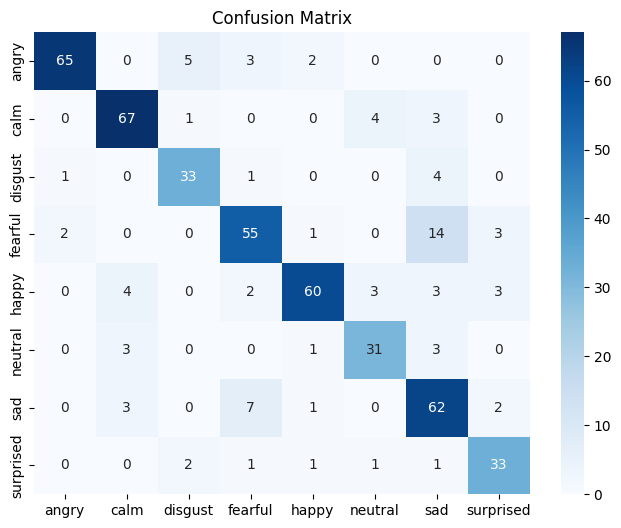

              precision    recall  f1-score   support

       angry       0.96      0.87      0.91        75
        calm       0.87      0.89      0.88        75
     disgust       0.80      0.85      0.83        39
     fearful       0.80      0.73      0.76        75
       happy       0.91      0.80      0.85        75
     neutral       0.79      0.82      0.81        38
         sad       0.69      0.83      0.75        75
   surprised       0.80      0.85      0.83        39

    accuracy                           0.83       491
   macro avg       0.83      0.83      0.83       491
weighted avg       0.83      0.83      0.83       491



In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict
y_pred = np.argmax(model.predict(X_val), axis=1)

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix"); plt.show()

# Classification report
print(classification_report(y_val, y_pred, target_names=le.classes_))


In [49]:
model.save("/kaggle/working/emotion_recognition_model.h5")
